In [355]:
import numpy as np
import pandas as pd
import scipy.stats as sy
import matplotlib.pyplot as plt
from sklearn import cluster as sc
from sklearn import feature_selection as sf
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

data = pd.read_csv("final_data.csv", delimiter=',')

data.head(30)
data.drop(['Unnamed: 0'],axis=1)
cols = data.columns[-21:]
data.drop(cols, axis=1)

,Unnamed: 0,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q16A,Q16B,Q16C,Q16D,Q16E,Q16F,Q16G,Q8_1-5 weken getraind,Q8_12 weken of meer getraind,Q8_6-11 weken getraind,Q8_Geen aparte trainingsperiode (ik train gedurende het hele jaar),Q8_Niet of nauwelijks getraind,Q9_1 keer per week,Q9_1 tot 3 keer per maand,Q9_2 keer per week,Q9_3 keer per week,Q9_4 of 5 keer per week,Q9_Meer dan 5 keer per week,Q9_Minder dan 1 keer per maand,Q10_0-1 maand,Q10_1-3 maanden,Q10_3-6 maanden,Q10_6 maanden - 1 jaar,Q10_Langer dan een jaar,Q11_Ik wil niet vaker en/of meer kilometers hardlopen dan ik nu doe,Q11_Ik zou meer kilometers willen hardlopen,Q11_Ik zou vaker willen hardlopen,Q11_Ik zou zowel vaker als meer kilometers willen hardlopen,Q12A_False,Q12A_True,Q12B_False,Q12B_True,Q12C_False,Q12C_True,Q12D_False,Q12D_True,Q12E_False,Q12E_True,Q12F_False,Q12F_True,"Q14_Anders, namelijk ...",Q14_Ik begin meestal met hardlopen bij mijn hardloopvereniging.,Q14_Ik begin meestal met hardlopen vanuit mijn huis.,Q14_Ik begin meestal met hardlopen vanuit of dichtbij het huis van mijn trainingspartner.,Q14_Ik begin meestal met hardlopen vanuit of dichtbij mijn werk.,"Q15_Anders, namelijk…",Q15_Ik reis vaak meer dan 5 km van waar ik woon,Q15_Ik ren altijd binnen 1 km van waar ik woon,Q15_Ik ren altijd binnen 5 km van waar ik woon,"Q15_Niet, ik loop thuis de deur uit","Q43_Ja, ik maak gebruik van een losstaande sport-app / een sport-app gekoppeld aan mijn sporthorloge, activity tracker en/of","Q43_Nee, ik ken geen sport-apps en gebruik ze niet","Q43_Nee, ik maak geen gebruik van een sport-app, maar ik heb in het verleden wel een sport-app gebruikt","Q43_Nee, ik weet van het bestaan van sport-apps, maar ik gebruik er geen",Q44A_False,Q44A_True,Q44B_False,Q44B_True,Q44C_False,Q44C_True,Q44D_False,Q44D_True,Q45A_False,Q45A_True,Q45B_False,Q45B_True,Q45C_False,Q45C_True,Q45D_False,Q45D_True,Q45E_False,Q45F_False,Q45F_True,Q45G_False,Q45G_True,Q45H_False,Q45H_True,Q45I_False,Q45I_True,Q45J_False,Q45J_True,Q45K_False,Q45K_True,Q45L_False,Q45L_True,Q45M_False,Q45M_True,Q45N_False,Q45N_True,Q45O_False,Q45O_True,Q45P_False,Q45P_True,Q45Q_False,Q45Q_True,Q45R_False,Q45R_True,Q45S_False,Q45S_True,Q45T_False,Q45T_True,Q45U_False,Q45U_True,Q45V_False,Q45V_True,Q45W_False,Q45W_True,Q45X_False,Q45X_True,"Q46_Anders, namelijk",Q46_Endomondo Hardlopen,Q46_Fitbit,Q46_Garmin Connect,Q46_Hardlopen met Evy,Q46_Hardlopen.nl,Q46_Looptijden.nl,Q46_MY ASICS,Q46_MapMyRun,Q46_MyFitnessPal,Q46_Nike+ Run Club,Q46_Polar Beat,Q46_Polar Flow,Q46_Prorun,Q46_RunKeeper,Q46_Runtastic Hardlopen en Fitness,Q46_Samsung Health,Q46_Sports Tracker voor Fietsen en Hardlopen,Q46_Strava,Q46_Suunto Movescount,Q46_TomTom Sports,Q46_TrainingPeaks,Q47_Man,Q47_Vrouw,"Q51_Anders, namelijk ...",Q51_Basisonderwijs,Q51_HAVO of VWO,"Q51_Hoger beroepsonderwijs (HBO), universiteit (WO)","Q51_Lager beroepsonderwijs (LBO, MAVO, VMBO)",Q51_Middelbaar beroepsonderwijs (MBO)
0,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
1,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0
2,2,True,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0
3,3,False,False,False,Fal

array([14.76, 19.59, 23.13, 25.97, 28.29, 30.42, 32.42, 34.38, 36.3 ,
       38.17, 39.98, 41.7 , 43.39, 44.95, 46.48, 48.  , 49.5 , 50.94,
       52.37, 53.78, 55.12, 56.37, 57.61, 58.8 , 59.96, 61.08, 62.18,
       63.27, 64.35, 65.41, 66.43, 67.38, 68.33, 69.24, 70.13, 71.01,
       71.88, 72.72, 73.55, 74.35, 75.14, 75.91, 76.67, 77.42, 78.14,
       78.85, 79.55, 80.24, 80.92, 81.57, 82.21, 82.84, 83.46, 84.07,
       84.66, 85.24, 85.8 , 86.35, 86.88, 87.4 , 87.91, 88.41, 88.89,
       89.36, 89.82, 90.26, 90.7 , 91.14, 91.56, 91.95, 92.34, 92.72,
       93.1 , 93.47, 93.82, 94.16, 94.49, 94.81, 95.12])

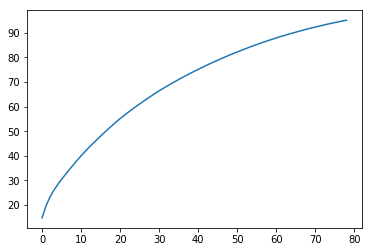

In [371]:
# data = data.drop(['Q47_Man', 'Q47_Vrouw', 'Q48', 'Q49', 'Q50'], axis=1)
# data = data.drop(['Q48', 'Q49', 'Q50'], axis=1)
# data = data.drop(['Q49', 'Q50'], axis=1)

X = data.values
X = X.astype(float)
# X = X[:,2:]
X_train = X[:400]
X_val = X[401:]

scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_val = scaler.transform(X_val)



pca = PCA(.95)
pca.fit(X_train)
var = pca.explained_variance_ratio_
var1=np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)
plt.plot(var1)
var1
# feature0 = X[:,0].astype(int)
# MI0 = sf.mutual_info_classif(X[:,1:], feature0)
# print(np.shape(X[:,0]))

# pca = sd.PCA().fit(X)

# kmeans = cl.KMeans(n_clusters=4).fit(X)
# labels = kmeans.labels_
# print(labels)
# indices = [i for i, x in enumerate(labels) if x == 0]
# pd.options.display.max_columns = None
# print(data.iloc[indices])

In [365]:
X_train = pca.transform(X_train)
X_val = pca.transform(X_val)


In [370]:
kmeans_train = cl.KMeans(n_clusters=3).fit(X_train)
labels_t = kmeans_train.labels_
kmeans = cl.KMeans(n_clusters=3).fit(X[:400])
labels = kmeans.labels_

# print(labels_t)
# print(labels)
# indices = [i for i, x in enumerate(labels_t) if x == 0]
# data.iloc[indices].astype(int)

[2 0 0 2 2 0 1 0 2 0 0 0 0 0 2 2 1 1 0 0 0 2 0 2 0 0 1 1 2 2 0 0 0 0 0 2 1
 0 2 2 1 0 2 0 0 2 2 2 0 0 0 2 2 1 1 0 2 1 2 0 0 0 0 2 2 0 0 0 1 0 1 1 0 0
 1 1 0 0 0 2 0 2 1 0 0 0 0 2 2 0 0 2 0 1 2 2 0 0 0 0 0 2 2 0 0 0 0 1 0 0 1
 2 2 0 2 1 2 2 0 2 1 0 0 0 1 2 0 2 0 0 0 2 2 0 0 1 0 0 0 0 0 0 1 2 0 2 0 1
 2 2 2 0 0 0 0 1 0 2 0 2 0 0 2 0 0 0 0 0 1 0 0 1 2 2 1 2 0 0 2 0 1 0 2 2 1
 0 0 0 2 0 0 2 2 2 0 0 0 2 2 2 0 2 1 0 0 2 2 2 0 1 0 0 2 1 0 0 1 1 0 2 0 2
 1 0 0 1 0 0 0 2 0 0 1 0 1 0 1 2 0 0 1 2 0 0 2 0 2 2 2 0 2 0 0 1 1 1 2 0 0
 0 2 1 2 0 0 1 0 2 0 0 2 0 2 0 2 2 1 1 0 1 2 0 0 0 2 2 0 2 0 0 2 0 0 2 2 2
 0 0 1 0 0 0 0 0 1 2 0 0 1 2 0 2 0 0 2 0 0 2 2 2 0 2 0 0 1 0 0 2 0 1 0 2 1
 0 0 0 2 0 0 0 0 0 0 2 0 2 0 0 1 2 0 2 0 1 2 0 0 1 0 2 1 0 0 1 0 2 0 0 1 0
 0 0 0 2 1 2 0 2 0 1 0 0 1 0 0 2 0 2 0 2 0 1 1 0 0 0 0 0 1 0]
[2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2

In [350]:
# data = pd.read_csv("one_hot_data.csv", delimiter=',')
# manN = sum(data.Q47_Man)
# vrN = sum(data.Q47_Vrouw)

# Q13a = sum(data.Q13A)
# Q13b= sum(data.Q13B)
# Q13c= sum(data.Q13C)
# Q13d= sum(data.Q13D)
# Q13e= sum(data.Q13E)
# Q13f= sum(data.Q13F)
# Q13g= sum(data.Q13G)

# total = data.sum()
# total = list(total[2:])
# total
# # l = [manN, vrN, Q13a, Q13b, Q13c, Q13d, Q13e, Q13f, Q13g]

# sy.chisquare(total[:2])
data.head(20)

,Unnamed: 0,Q13A,Q13B,Q13C,Q13D,Q13E,Q13F,Q13G,Q16A,Q16B,Q16C,Q16D,Q16E,Q16F,Q16G,Q8_1-5 weken getraind,Q8_12 weken of meer getraind,Q8_6-11 weken getraind,Q8_Geen aparte trainingsperiode (ik train gedurende het hele jaar),Q8_Niet of nauwelijks getraind,Q9_1 keer per week,Q9_1 tot 3 keer per maand,Q9_2 keer per week,Q9_3 keer per week,Q9_4 of 5 keer per week,Q9_Meer dan 5 keer per week,Q9_Minder dan 1 keer per maand,Q10_0-1 maand,Q10_1-3 maanden,Q10_3-6 maanden,Q10_6 maanden - 1 jaar,Q10_Langer dan een jaar,Q11_Ik wil niet vaker en/of meer kilometers hardlopen dan ik nu doe,Q11_Ik zou meer kilometers willen hardlopen,Q11_Ik zou vaker willen hardlopen,Q11_Ik zou zowel vaker als meer kilometers willen hardlopen,Q12A_False,Q12A_True,Q12B_False,Q12B_True,Q12C_False,Q12C_True,Q12D_False,Q12D_True,Q12E_False,Q12E_True,Q12F_False,Q12F_True,"Q14_Anders, namelijk ...",Q14_Ik begin meestal met hardlopen bij mijn hardloopvereniging.,Q14_Ik begin meestal met hardlopen vanuit mijn huis.,Q14_Ik begin meestal met hardlopen vanuit of dichtbij het huis van mijn trainingspartner.,Q14_Ik begin meestal met hardlopen vanuit of dichtbij mijn werk.,"Q15_Anders, namelijk…",Q15_Ik reis vaak meer dan 5 km van waar ik woon,Q15_Ik ren altijd binnen 1 km van waar ik woon,Q15_Ik ren altijd binnen 5 km van waar ik woon,"Q15_Niet, ik loop thuis de deur uit","Q43_Ja, ik maak gebruik van een losstaande sport-app / een sport-app gekoppeld aan mijn sporthorloge, activity tracker en/of","Q43_Nee, ik ken geen sport-apps en gebruik ze niet","Q43_Nee, ik maak geen gebruik van een sport-app, maar ik heb in het verleden wel een sport-app gebruikt","Q43_Nee, ik weet van het bestaan van sport-apps, maar ik gebruik er geen",Q44A_False,Q44A_True,Q44B_False,Q44B_True,Q44C_False,Q44C_True,Q44D_False,Q44D_True,Q45A_False,Q45A_True,Q45B_False,Q45B_True,Q45C_False,Q45C_True,Q45D_False,Q45D_True,Q45E_False,Q45F_False,Q45F_True,Q45G_False,Q45G_True,Q45H_False,Q45H_True,Q45I_False,Q45I_True,Q45J_False,Q45J_True,Q45K_False,Q45K_True,Q45L_False,Q45L_True,Q45M_False,Q45M_True,Q45N_False,Q45N_True,Q45O_False,Q45O_True,Q45P_False,Q45P_True,Q45Q_False,Q45Q_True,Q45R_False,Q45R_True,Q45S_False,Q45S_True,Q45T_False,Q45T_True,Q45U_False,Q45U_True,Q45V_False,Q45V_True,Q45W_False,Q45W_True,Q45X_False,Q45X_True,"Q46_Anders, namelijk",Q46_Endomondo Hardlopen,Q46_Fitbit,Q46_Garmin Connect,Q46_Hardlopen met Evy,Q46_Hardlopen.nl,Q46_Looptijden.nl,Q46_MY ASICS,Q46_MapMyRun,Q46_MyFitnessPal,Q46_Nike+ Run Club,Q46_Polar Beat,Q46_Polar Flow,Q46_Prorun,Q46_RunKeeper,Q46_Runtastic Hardlopen en Fitness,Q46_Samsung Health,Q46_Sports Tracker voor Fietsen en Hardlopen,Q46_Strava,Q46_Suunto Movescount,Q46_TomTom Sports,Q46_TrainingPeaks,Q47_Man,Q47_Vrouw,"Q51_Anders, namelijk ...",Q51_Basisonderwijs,Q51_HAVO of VWO,"Q51_Hoger beroepsonderwijs (HBO), universiteit (WO)","Q51_Lager beroepsonderwijs (LBO, MAVO, VMBO)",Q51_Middelbaar beroepsonderwijs (MBO),Q48_<20,Q48_20-29,Q48_30-39,Q48_40-49,Q48_50-59,Q48_>60,Q48_0,Q49_<160,Q49_160-169,Q49_170-179,Q49_180-189,Q49_190-199,Q49_>200,Q49_0,Q50_<60,Q50_60-69,Q50_70-79,Q50_80-89,Q50_90-99,Q50_>100,Q50_0
0,0,False,False,False,False,False,True,False,True,False,False,False,False,False,False,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,1,0,0,1,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0
1,1,False,False,False,False,False,True,False,False,False,False,False,False,True,False,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,1,0,1,0,1,0,1,1,0,1,0,1,0,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,1,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0
2,2,True,False,False,False,False,False,False,False,False,False,False,False,True,False,0,0,0,0,